In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\user\\Desktop\\\ML_Project\\Kaggle\\Stress-Testing-Financial-Portfolios\\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\all_stocks_5yr.csv
C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\getSandP.py
C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\merge.sh
C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\individual_stocks_5yr\individual_stocks_5yr\.DS_Store
C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\individual_stocks_5yr\individual_stocks_5yr\AAL_data.csv
C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\individual_stocks_5yr\individual_stocks_5yr\AAPL_data.csv
C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\individual_stocks_5yr\individual_stocks_5yr\AAP_data.csv
C:\Users\user\Desktop\ML_Project\Kaggle\Stress-Testing-Financial-Portfolios\data\individual_stocks_5yr\individual_stocks_5yr\ABBV_data.csv
C:\Users\user\Desktop\ML_Pro

In [31]:
data_dir =  'C:\\Users\\user\\Desktop\\\ML_Project\\Kaggle\\Stress-Testing-Financial-Portfolios\\data\\individual_stocks_5yr\\individual_stocks_5yr'  #'/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/'

# List all files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('_data.csv')]

In [32]:
# Initialize an empty list to hold dataframes
dfs = []

# Loop over all files and read them into dataframes
for file in files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    
    # Extract stock ticker from file name
    stock_ticker = file.split('_')[0]
    df['Stock'] = stock_ticker
    
    # Append dataframe to list
    dfs.append(df)

# Concatenate all dataframes into one
combined_data = pd.concat(dfs)

# Convert the 'date' column to datetime
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Display the combined data
print(combined_data.head())

        date   open   high    low  close    volume Name Stock
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL   AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL   AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL   AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL   AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL   AAL


# Financial Crisis Scenario

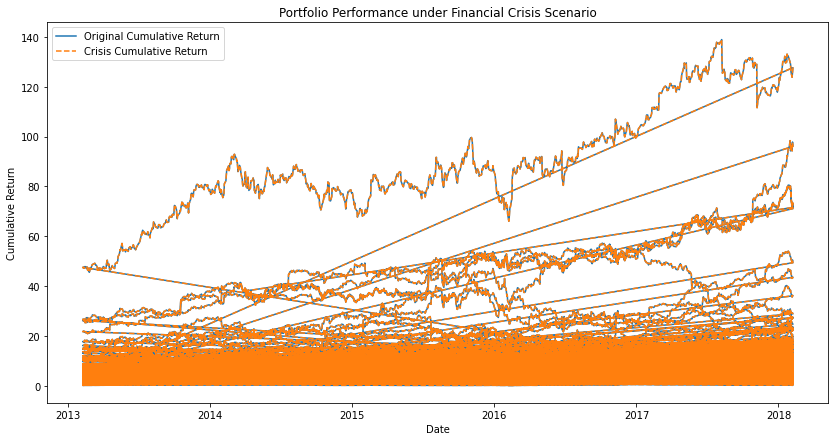

In [33]:
def financial_crisis_scenario(data, drop_percent):
    data['Crisis_Close'] = data['close'] * (1 - drop_percent / 100)
    return data

# Apply the financial crisis scenario with a 30% drop in prices
crisis_data = combined_data.copy()
crisis_data = financial_crisis_scenario(crisis_data, 30)

# Evaluate Portfolio Performance
# Calculate returns for original and crisis scenarios
combined_data['Return'] = combined_data['close'].pct_change()
crisis_data['Crisis_Return'] = crisis_data['Crisis_Close'].pct_change()

# Calculate cumulative returns for comparison
combined_data['Cumulative_Return'] = (1 + combined_data['Return']).cumprod()
crisis_data['Cumulative_Crisis_Return'] = (1 + crisis_data['Crisis_Return']).cumprod()

# Plot the cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(combined_data['date'], combined_data['Cumulative_Return'], label='Original Cumulative Return')
plt.plot(crisis_data['date'], crisis_data['Cumulative_Crisis_Return'], label='Crisis Cumulative Return', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio Performance under Financial Crisis Scenario')
plt.legend()
plt.show()

### Interpretation:

#### Compare Cumulative Returns: 
The plot will show how the portfolio’s cumulative return changes under the crisis scenario compared to the normal scenario.

#### Assess Impact: 
Evaluate the magnitude of the impact and the potential losses. This will help you understand how resilient your portfolio is to economic shocks.

### Interpretation of the Graph
Cumulative Return Curves:

Original Cumulative Return: This line represents the cumulative return of the portfolio under normal market conditions. It shows how the portfolio’s value grows over time without any simulated disruptions.
Crisis Cumulative Return: This line represents the cumulative return of the portfolio under the financial crisis scenario, where stock prices have been adjusted to reflect a 30% drop.
Initial Impact:

Comparison: Look at how the crisis cumulative return line starts compared to the original line. A significant drop at the start indicates a sharp initial impact of the financial crisis on the portfolio.
Magnitude of Drop: Assess the steepness of the initial drop. A steep decline suggests a severe immediate impact from the crisis.
Recovery Pattern:

Recovery Phase: Observe how the crisis line behaves over time after the initial drop. A slow or incomplete recovery can indicate that the portfolio struggles to regain its value after the crisis.
Duration of Impact: Note how long it takes for the crisis line to approach or diverge from the original cumulative return line. A prolonged period of underperformance suggests lasting effects from the crisis.
Volatility and Fluctuations:

Fluctuations in Crisis Line: Increased fluctuations in the crisis line compared to the original line might indicate higher volatility during the crisis period. This could affect investment stability and performance.
Volatility Analysis: You might consider calculating and comparing the standard deviation of returns for both scenarios to quantify volatility differences.
Overall Portfolio Resilience:

Drawdown Analysis: Determine the maximum drawdown (peak-to-trough decline) during the crisis scenario. This quantifies the worst loss experienced from the highest value before the decline.
Risk Assessment: A larger drawdown indicates higher risk exposure, while a smaller drawdown suggests better resilience to the financial crisis.
Strategic Insights:

Risk Management: If the portfolio shows significant losses or prolonged underperformance during the crisis, it may be a signal to review and adjust the risk management strategies or asset allocation.
Diversification: Analyze if diversification across different sectors or asset classes could mitigate the impact of the crisis. Compare the performance of various portfolio components under the crisis scenario.
Quantitative Measures:

Sharpe Ratio: Calculate the Sharpe ratio (risk-adjusted return) for both scenarios. This will help you understand how much return you’re getting for the level of risk.
Value at Risk (VaR): Assess the potential loss in value at a given confidence level to understand the portfolio’s exposure to extreme losses.
Visual Analysis Tips:
Color and Line Styles: Ensure that the crisis scenario line is distinct from the original line (e.g., use dashed lines for crisis and solid lines for original) to avoid confusion.
Legend and Labels: Make sure the graph has a clear legend and axis labels to accurately convey the information.
Example Interpretation:
Initial Drop: If the crisis line drops 30% immediately while the original line remains stable, it confirms a severe initial impact of the financial crisis.
Slow Recovery: If the crisis line remains below the original line for an extended period, it indicates that the portfolio may struggle to recover quickly from the crisis.
Increased Volatility: If the crisis line exhibits larger fluctuations compared to the original line, it signifies higher volatility during the crisis period.

# Interest Rate Hike Scenario

Objective:
Evaluate how a significant increase in interest rates impacts the performance of your portfolio. Interest rate hikes can affect bond prices, stock valuations, and overall portfolio returns.

Steps to Implement the Interest Rate Hike Scenario:
1. Define the Interest Rate Hike:

- Magnitude of Hike: Decide on the percentage increase in interest rates. For example, assume a 2% increase in interest rates.
- Timeframe: Specify the period over which the hike occurs (e.g., over 6 months or instantaneously).

2. Impact on Bonds:
Interest rates have an inverse relationship with bond prices. When interest rates rise, bond prices typically fall. For bonds in your portfolio:
- Calculate New Prices: Adjust bond prices based on the duration and the magnitude of the rate hike.
- Formula: Use the bond price formula or duration model to estimate the new bond prices.

3. Impact on Stocks:
Higher interest rates can lead to higher borrowing costs for companies, potentially reducing their profitability and stock prices. For stocks in your portfolio:

Estimate Impact: Apply a model to estimate how stock prices might adjust due to increased interest rates. This could involve:
- Discounted Cash Flow (DCF) Model: Adjust the discount rate in the DCF model to reflect higher interest rates.
- Historical Correlation: Use historical data to estimate how stocks have reacted to similar interest rate hikes.

4. Apply Scenario to Portfolio:

- Adjust Prices: Update the prices of bonds and stocks in your portfolio based on the rate hike.
- Recalculate Returns: Compute the new portfolio returns using the adjusted prices.

5. Analyze Results:
- Compare Performance: Compare the portfolio's performance under the interest rate hike scenario to its performance under normal conditions.
- Assess Impact: Determine the magnitude of the impact on portfolio value, returns, and risk.

In [34]:
def interest_rate_hike_scenario(data, drop_percent):
    data['Hike_Close'] = data['close'] * (1 - drop_percent / 100)
    return data


In [35]:
# Apply the interest rate hike scenario with a 10% drop in prices
hike_data = combined_data.copy()
hike_data = interest_rate_hike_scenario(hike_data, 10)

In [36]:
# Calculate returns for original and interest rate hike scenarios
combined_data['Return'] = combined_data['close'].pct_change()
hike_data['Hike_Return'] = hike_data['Hike_Close'].pct_change()

# Calculate cumulative returns for both scenarios
combined_data['Cumulative_Return'] = (1 + combined_data['Return']).cumprod()
hike_data['Cumulative_Hike_Return'] = (1 + hike_data['Hike_Return']).cumprod()


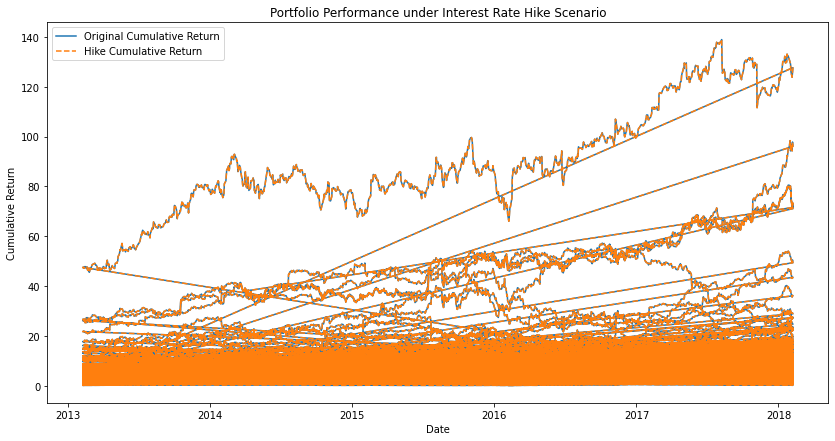

In [37]:
import matplotlib.pyplot as plt

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(combined_data['date'], combined_data['Cumulative_Return'], label='Original Cumulative Return')
plt.plot(hike_data['date'], hike_data['Cumulative_Hike_Return'], label='Hike Cumulative Return', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio Performance under Interest Rate Hike Scenario')
plt.legend()
plt.show()


industry mapping and average stock price calculation

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the data
data_dir = 'C:\\Users\\user\\Desktop\\\ML_Project\\Kaggle\\Stress-Testing-Financial-Portfolios\\data\\individual_stocks_5yr\\individual_stocks_5yr'

# List all CSV files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('_data.csv')]

# Define industry mapping (you'll need to adjust this based on your knowledge of the industries)
industry_mapping = {
    'CL_data.csv': 'Consumer Staples',
    'FDX_data.csv': 'Industrials',
    'AMAT_data.csv': 'Information Technology',
    'GLW_data.csv': 'Information Technology',
    'ANSS_data.csv': 'Information Technology',
    'DVN_data.csv': 'Energy',
    'CBG_data.csv': 'Real Estate',
    'TSS_data.csv': 'Information Technology',
    'JEC_data.csv': 'Industrials',
    'VRTX_data.csv': 'Health Care',
    'FBHS_data.csv': 'Consumer Discretionary',
    'AOS_data.csv': 'Industrials',
    'MSI_data.csv': 'Information Technology',
    'SBAC_data.csv': 'Real Estate',
    'MNST_data.csv': 'Consumer Staples',
    'CHRW_data.csv': 'Industrials',
    'NRG_data.csv': 'Utilities',
    'NLSN_data.csv': 'Communication Services',
    'NDAQ_data.csv': 'Financials',
    'GOOG_data.csv': 'Communication Services',
    'DHR_data.csv': 'Health Care',
    'PDCO_data.csv': 'Health Care',
    'AMZN_data.csv': 'Consumer Discretionary',
    'SRCL_data.csv': 'Health Care',
    'ALLE_data.csv': 'Industrials',
    'MCHP_data.csv': 'Information Technology',
    'CERN_data.csv': 'Health Care',
    'PXD_data.csv': 'Energy',
    'NOC_data.csv': 'Industrials',
    'STI_data.csv': 'Financials',
    'CBS_data.csv': 'Communication Services',
    'SPG_data.csv': 'Real Estate',
    'AJG_data.csv': 'Financials',
    'XEC_data.csv': 'Energy',
    'XL_data.csv': 'Financials',
    'LLY_data.csv': 'Health Care',
    'GGP_data.csv': 'Real Estate',
    'SIG_data.csv': 'Consumer Discretionary',
    'KMX_data.csv': 'Consumer Discretionary',
    'ALL_data.csv': 'Financials',
    'DFS_data.csv': 'Financials',
    'UPS_data.csv': 'Industrials',
    'HOLX_data.csv': 'Health Care',
    'UNM_data.csv': 'Financials',
    'NI_data.csv': 'Utilities',
    'AYI_data.csv': 'Industrials',
    'BA_data.csv': 'Industrials',
    'HES_data.csv': 'Energy',
    'PLD_data.csv': 'Real Estate',
    'PVH_data.csv': 'Consumer Discretionary',
    'PRU_data.csv': 'Financials',
    'PCG_data.csv': 'Utilities',
    'APC_data.csv': 'Energy',
    'ALK_data.csv': 'Industrials',
    'PBCT_data.csv': 'Financials',
    'AGN_data.csv': 'Health Care',
    'CAH_data.csv': 'Health Care',
    'MAA_data.csv': 'Real Estate',
    'DRI_data.csv': 'Consumer Discretionary',
    'ADM_data.csv': 'Consumer Staples',
    'CHD_data.csv': 'Consumer Staples',
    'RJF_data.csv': 'Financials',
    'INTU_data.csv': 'Information Technology',
    'MDLZ_data.csv': 'Consumer Staples',
    'MO_data.csv': 'Consumer Staples',
    'TROW_data.csv': 'Financials',
    'VMC_data.csv': 'Materials',
    'GILD_data.csv': 'Health Care',
    'VLO_data.csv': 'Energy',
    'FLR_data.csv': 'Industrials',
    'LOW_data.csv': 'Consumer Discretionary',
    'UNP_data.csv': 'Industrials',
    'A_data.csv': 'Health Care',
    'HOG_data.csv': 'Consumer Discretionary',
    'TSCO_data.csv': 'Consumer Discretionary',
    'GM_data.csv': 'Consumer Discretionary',
    'NFLX_data.csv': 'Communication Services',
    'PFE_data.csv': 'Health Care',
    'PPL_data.csv': 'Utilities',
    'EVHC_data.csv': 'Health Care',
    'HAL_data.csv': 'Energy',
    'DG_data.csv': 'Consumer Discretionary',
    'MRO_data.csv': 'Energy',
    'FISV_data.csv': 'Information Technology',
    'L_data.csv': 'Financials',
    'HRL_data.csv': 'Consumer Staples',
    'TEL_data.csv': 'Information Technology',
    'ISRG_data.csv': 'Health Care',
    'NUE_data.csv': 'Materials',
    'KEY_data.csv': 'Financials',
    'TXT_data.csv': 'Industrials',
    'FE_data.csv': 'Utilities',
    'UTX_data.csv': 'Industrials',
    'GE_data.csv': 'Industrials',
    'CPB_data.csv': 'Consumer Staples',
    'GRMN_data.csv': 'Consumer Discretionary',
    'SRE_data.csv': 'Utilities',
    'VRSN_data.csv': 'Information Technology',
    'HCP_data.csv': 'Real Estate',
    'GPS_data.csv': 'Consumer Discretionary',
    'CBOE_data.csv': 'Financials',
    'DVA_data.csv': 'Health Care',
    'CHK_data.csv': 'Energy',
    'FRT_data.csv': 'Real Estate',
    'FFIV_data.csv': 'Information Technology',
    'REGN_data.csv': 'Health Care',
    'DXC_data.csv': 'Information Technology',
    'LH_data.csv': 'Health Care',
    'MAC_data.csv': 'Real Estate',
    'IQV_data.csv': 'Health Care',
    'BLK_data.csv': 'Financials',
    'FMC_data.csv': 'Materials',
    'RE_data.csv': 'Financials',
    'IVZ_data.csv': 'Financials',
    'ORCL_data.csv': 'Information Technology',
    'NWL_data.csv': 'Consumer Discretionary',
    'CMG_data.csv': 'Consumer Discretionary',
    'NOV_data.csv': 'Energy',
    'ADBE_data.csv': 'Information Technology',
    'GD_data.csv': 'Industrials',
    'PWR_data.csv': 'Industrials'
}

In [54]:
# Function to load data from CSV and add industry information
def load_and_add_industry(file_path, industry_mapping):
    df = pd.read_csv(file_path)
    stock_symbol = os.path.basename(file_path).split('_')[0]
    df['Symbol'] = stock_symbol
    stock_file = os.path.basename(file_path)  # e.g., "CL_data.csv"
    df['Industry'] = industry_mapping.get(stock_file, 'Unknown')
    #df['Industry'] = industry_mapping.get(stock_symbol, 'Unknown')
    return df

# Directory containing the CSV files
directory = 'C:\\Users\\user\\Desktop\\\ML_Project\\Kaggle\\Stress-Testing-Financial-Portfolios\\data\\individual_stocks_5yr\\individual_stocks_5yr'

# Load all CSV files and add industry information
all_data = []
for file_name in os.listdir(directory):
    if file_name.endswith('_data.csv'):
        file_path = os.path.join(directory, file_name)
        df = load_and_add_industry(file_path, industry_mapping)
        all_data.append(df)

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Group by industry
grouped_by_industry = combined_data.groupby('Industry')

# Calculate mean close price for each industry
industry_mean_close = grouped_by_industry['close'].mean()
print(industry_mean_close)


Industry
Communication Services    200.393869
Consumer Discretionary    124.226320
Consumer Staples           45.333131
Energy                     65.430793
Financials                 74.788108
Health Care               104.880779
Industrials                90.781010
Information Technology     67.459319
Materials                  67.338741
Real Estate                78.647196
Unknown                    81.884365
Utilities                  45.743412
Name: close, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7448\2107454368.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_mean_close.values, y=industry_mean_close.index, palette='viridis')


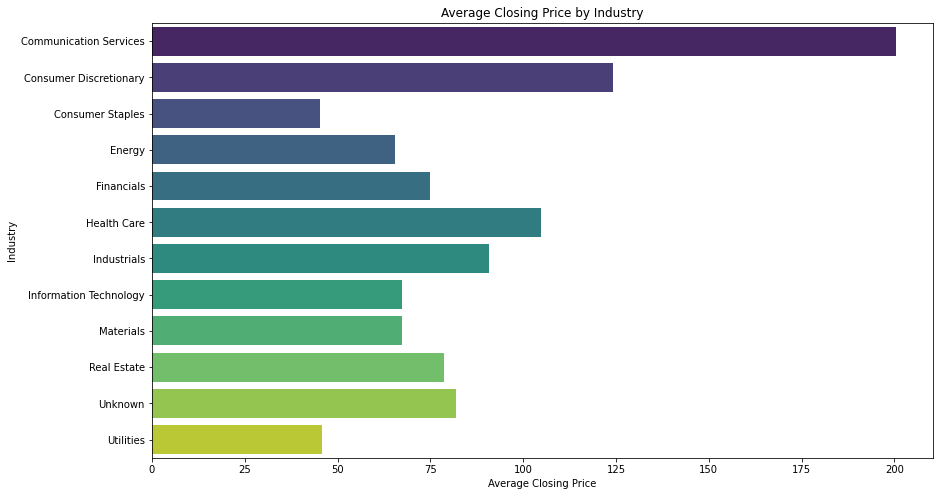

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the average closing price by industry
plt.figure(figsize=(14, 8))
sns.barplot(x=industry_mean_close.values, y=industry_mean_close.index, palette='viridis')

plt.title('Average Closing Price by Industry')
plt.xlabel('Average Closing Price')
plt.ylabel('Industry')

# Show the plot
plt.show()

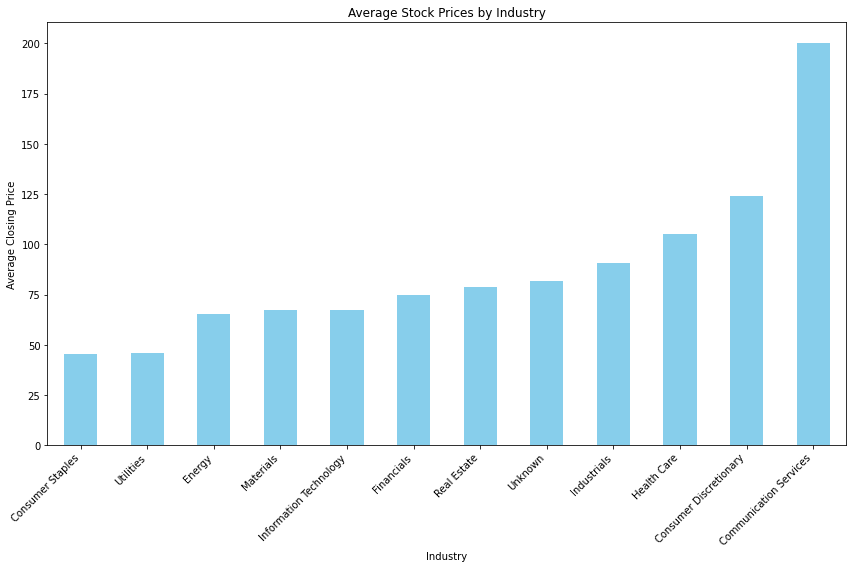

In [56]:
# Initialize an empty list to hold DataFrames
data_list = []

# Load and process each file
for file in files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    # Extract ticker symbol from file name
    ticker = file
    industry = industry_mapping.get(ticker, 'Unknown')  # Get the industry
    df['Industry'] = industry
    data_list.append(df)

# Concatenate all DataFrames
all_data = pd.concat(data_list, ignore_index=True)

# Convert the date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

# Calculate the average price for each industry
avg_prices = all_data.groupby('Industry')['close'].mean().sort_values()

# Plot the data
plt.figure(figsize=(12, 8))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Stock Prices by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7448\624726494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_mean_volume.values, y=industry_mean_volume.index, palette='plasma')


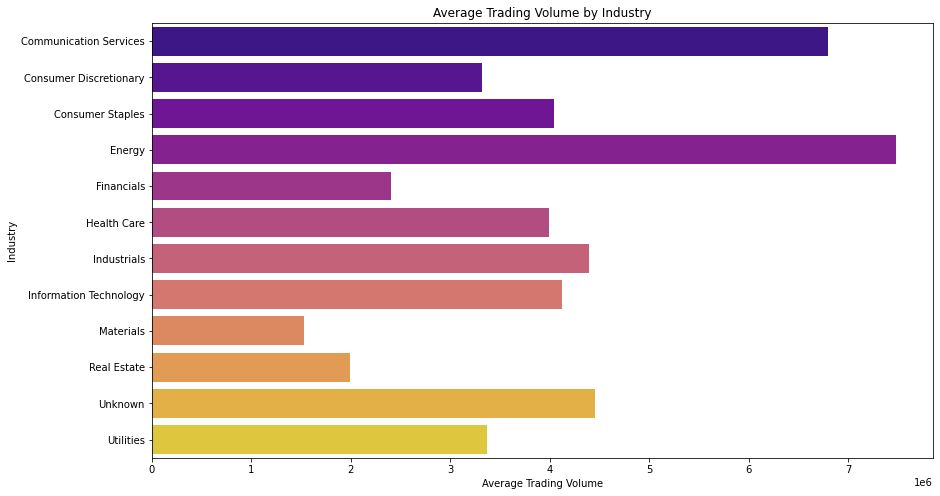

In [57]:
industry_mean_volume = grouped_by_industry['volume'].mean()

plt.figure(figsize=(14, 8))
sns.barplot(x=industry_mean_volume.values, y=industry_mean_volume.index, palette='plasma')
plt.title('Average Trading Volume by Industry')
plt.xlabel('Average Trading Volume')
plt.ylabel('Industry')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7448\1487948862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_mean_return.values, y=industry_mean_return.index, palette='magma')


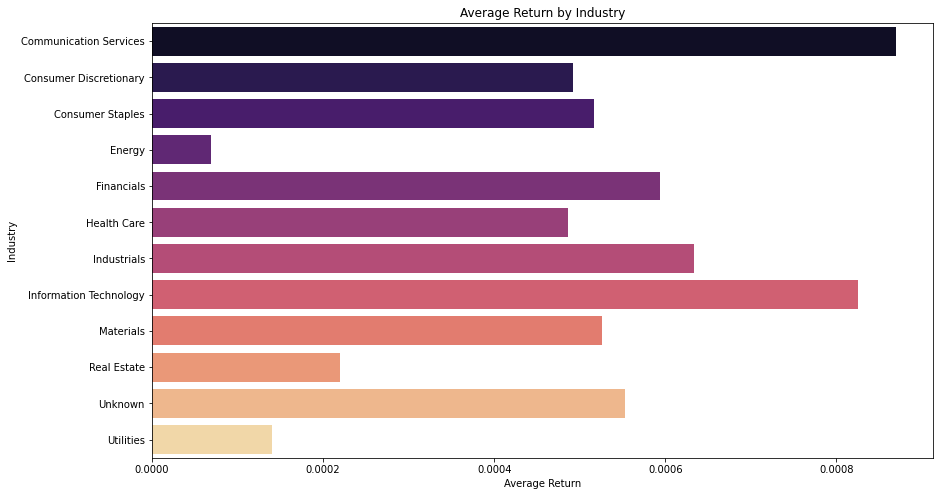

In [58]:
# Assuming 'return' is calculated as (close price - previous close price) / previous close price
combined_data['return'] = combined_data.groupby('Symbol')['close'].pct_change()
industry_mean_return = grouped_by_industry['return'].mean()

plt.figure(figsize=(14, 8))
sns.barplot(x=industry_mean_return.values, y=industry_mean_return.index, palette='magma')
plt.title('Average Return by Industry')
plt.xlabel('Average Return')
plt.ylabel('Industry')
plt.show()


Measures the variability in stock prices within each industry.

C:\Users\user\AppData\Local\Temp\ipykernel_7448\3334897402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_volatility.values, y=industry_volatility.index, palette='cividis')


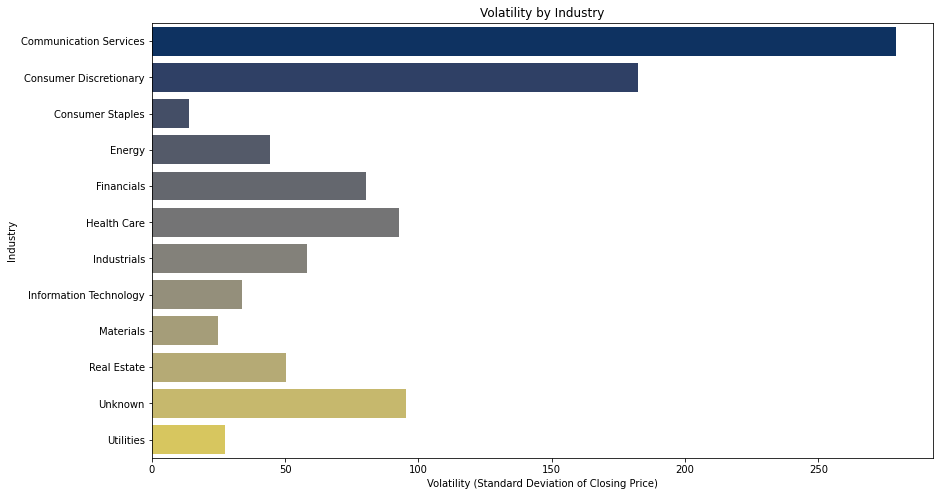

In [59]:
industry_volatility = grouped_by_industry['close'].std()

plt.figure(figsize=(14, 8))
sns.barplot(x=industry_volatility.values, y=industry_volatility.index, palette='cividis')
plt.title('Volatility by Industry')
plt.xlabel('Volatility (Standard Deviation of Closing Price)')
plt.ylabel('Industry')
plt.show()


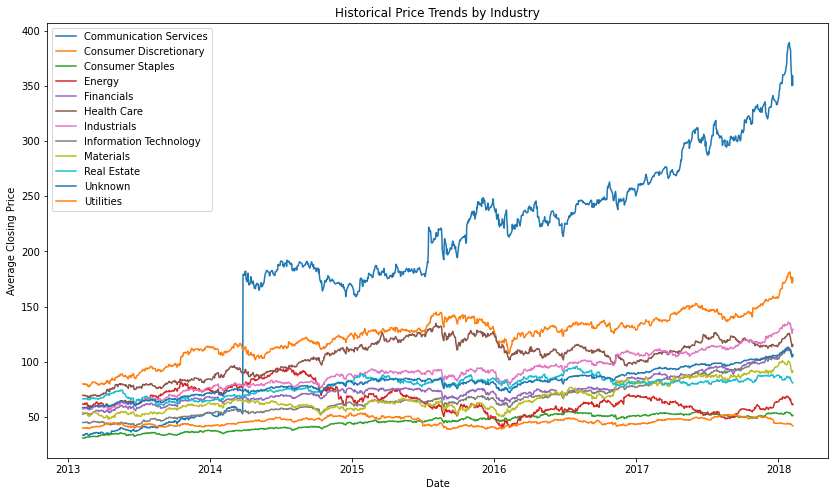

In [60]:
combined_data['date'] = pd.to_datetime(combined_data['date'])
industry_trends = combined_data.groupby(['date', 'Industry'])['close'].mean().unstack()

plt.figure(figsize=(14, 8))
for industry in industry_trends.columns:
    plt.plot(industry_trends.index, industry_trends[industry], label=industry)

plt.title('Historical Price Trends by Industry')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


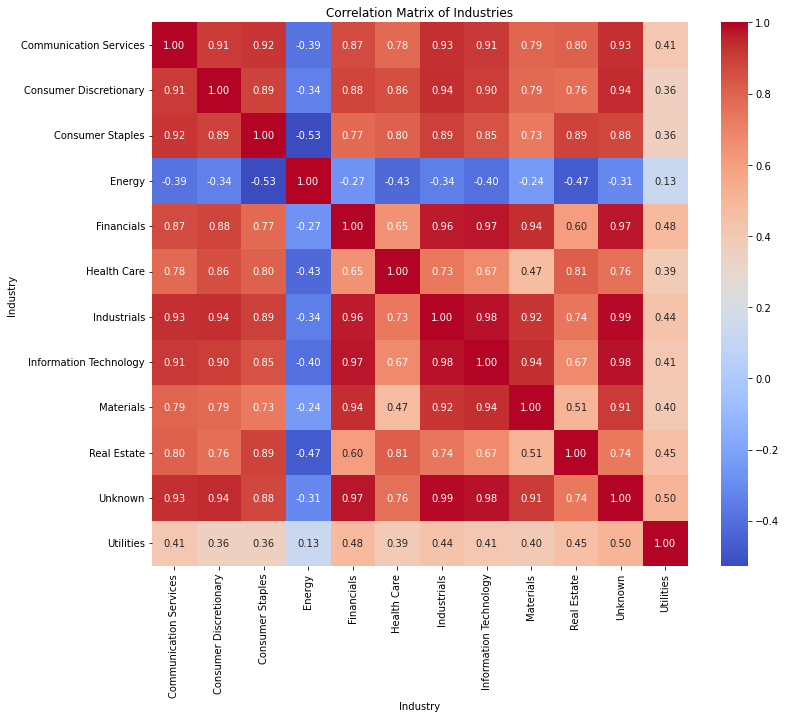

In [61]:
industry_corr = combined_data.pivot_table(index='date', columns='Industry', values='close').corr()

plt.figure(figsize=(12, 10))
sns.heatmap(industry_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Industries')
plt.show()
